In [44]:
import numpy as np
import math
import matplotlib.pyplot as plt

import numpy as np
import math
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy import integrate
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

3.463047545343821


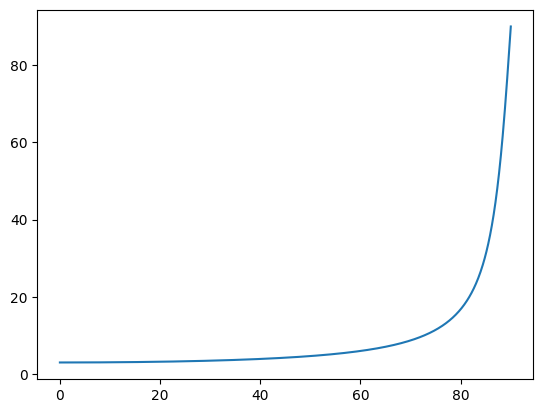

In [45]:
def az_angle(incl, dc):

    beta = np.deg2rad(incl)
    c = np.deg2rad(dc)
    
    return np.rad2deg(np.arctan(1/(np.tan(beta)*np.cos(c))))


incl = 87
dlng = np.linspace(0, 90, 1000)

plt.plot(dlng, az_angle(incl, dlng))

print(az_angle(incl, 30))

-27.947086046186605


C:\Users\dolin\AppData\Local\Temp\ipykernel_12344\2259645540.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  return np.rad2deg(np.arctan(1/(np.tan(beta)*np.cos(c))))


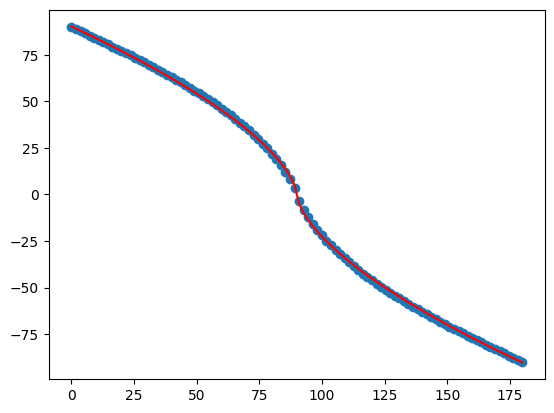

In [116]:
def avg_az(incl):
    result = integrate.quad(lambda x: az_angle(incl,x), 0, 90)
    return result[0]/90

def avg_az_fit(incl):
    a = -5.3
    b = 0.63

    x = incl - 90

    sign = 1
    if (x < 0):
        sign = -1
        
    return sign * a * abs(x)**b
    

print(avg_az_fit(104))

dincl = np.linspace(0, 180, 100)
avg_az_ = [avg_az(i) for i in dincl]
avg_az_fit_ = [avg_az_fit(i) for i in dincl]


plt.scatter(dincl, avg_az_)
plt.plot(dincl, avg_az_fit_, 'r')

[-5.5   0.62]


C:\Users\dolin\AppData\Local\Temp\ipykernel_12344\1690186105.py:6: RuntimeWarning: invalid value encountered in power
  return a * x**b
C:\Users\dolin\AppData\Local\Temp\ipykernel_12344\1690186105.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(custom_function, x, y, initial_guess)


ValueError: Input contains NaN.

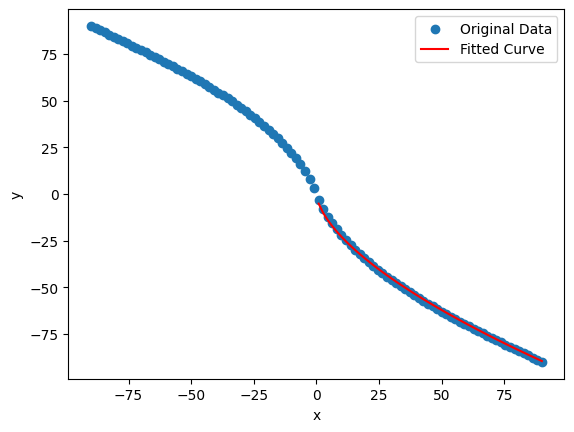

In [92]:
x = dincl - 90
y = avg_az_

# Define your custom function
def custom_function(x, a, b):
    return a * x**b
    
initial_guess = [-5.5, 0.62]

# Use curve_fit to fit the function to the data
params, covariance = curve_fit(custom_function, x, y, initial_guess)

print(params)

# params contains the optimized parameters for your function

# Generate fitted y values using the optimized parameters
y_fit = custom_function(x, *params)

# Plot the original data and the fitted curve
plt.scatter(x, y, label='Original Data')
plt.plot(x, y_fit, label='Fitted Curve', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Calculate R-squared value
r2 = r2_score(y, y_fit)
print("R-squared value:", r2)

plt.show()